In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

In [2]:
xlsx = pd.ExcelFile("DataAnnex_Global_NonCO2_Projections_Dec2012.xlsx")
df = pd.read_excel(xlsx, 'TOTAL')

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Source:,All Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gas:,All Gases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Sector:,All Sectors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,MtCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Country,1990,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000,2020.000000,2025.000000,2030.000000,NaN,"""Rest of"" Region",Main Region,Secondary Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,NaN,Middle East,0.031988,0.035258,0.046546,0.045079,0.046914,0.047724,0.049095,0.049251,0.049288,NaN,NaN,NaN,NaN
222,NaN,OECD,0.290166,0.297654,0.288165,0.258823,0.254488,0.254855,0.253846,0.253403,0.248585,NaN,NaN,NaN,NaN
223,NaN,Non-OECD Asia,0.249106,0.277876,0.277808,0.295479,0.299520,0.303535,0.314367,0.327293,0.343980,NaN,NaN,NaN,NaN
224,NaN,Non-OECD Europe & Eurasia,0.162569,0.117770,0.109869,0.105042,0.104316,0.102049,0.100141,0.096517,0.092907,NaN,NaN,NaN,NaN


In [4]:
delete_columns = df.drop(columns=["Unnamed: 0", "Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14"])
delete_columns

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Source:,All Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gas:,All Gases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sector:,All Sectors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,MtCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country,1990,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000,2020.000000,2025.000000,2030.000000
...,...,...,...,...,...,...,...,...,...,...
221,Middle East,0.031988,0.035258,0.046546,0.045079,0.046914,0.047724,0.049095,0.049251,0.049288
222,OECD,0.290166,0.297654,0.288165,0.258823,0.254488,0.254855,0.253846,0.253403,0.248585
223,Non-OECD Asia,0.249106,0.277876,0.277808,0.295479,0.299520,0.303535,0.314367,0.327293,0.343980
224,Non-OECD Europe & Eurasia,0.162569,0.117770,0.109869,0.105042,0.104316,0.102049,0.100141,0.096517,0.092907


In [5]:
rename_columns = delete_columns.rename(columns={"Unnamed: 1": "Name", "Unnamed: 2": "1990", "Unnamed: 3": "1995", "Unnamed: 4": "2000","Unnamed: 5": "2005",
                   "Unnamed: 6": "2010","Unnamed: 7": "2015","Unnamed: 8": "2020","Unnamed: 9": "2025","Unnamed: 10": "2030"})
rename_columns

,Name,1990,1995,2000,2005,2010,2015,2020,2025,2030
0,Source:,All Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gas:,All Gases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sector:,All Sectors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,MtCO2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Country,1990,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000,2020.000000,2025.000000,2030.000000
...,...,...,...,...,...,...,...,...,...,...
221,Middle East,0.031988,0.035258,0.046546,0.045079,0.046914,0.047724,0.049095,0.049251,0.049288
222,OECD,0.290166,0.297654,0.288165,0.258823,0.254488,0.254855,0.253846,0.253403,0.248585
223,Non-OECD Asia,0.249106,0.277876,0.277808,0.295479,0.299520,0.303535,0.314367,0.327293,0.343980
224,Non-OECD Europe & Eurasia,0.162569,0.117770,0.109869,0.105042,0.104316,0.102049,0.100141,0.096517,0.092907


In [6]:
delete_null_vals = rename_columns.dropna(subset=["Name","1990","1995","2000","2005","2010","2015","2020","2025","2030"])
delete_null_vals

,Name,1990,1995,2000,2005,2010,2015,2020,2025,2030
4,Country,1990,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000,2020.000000,2025.000000,2030.000000
5,Afghanistan,12.0038,12.451267,15.013068,16.400058,18.312538,20.373978,22.656848,25.368594,28.213015
6,Albania,4.78399,3.434860,3.481704,2.889131,2.766238,2.795499,2.838888,2.911152,2.995561
7,Algeria,32.1325,29.682993,37.119169,42.752569,47.710842,57.507612,63.064297,68.139281,72.380065
8,Andorra,0.0228627,0.029743,0.035383,0.042290,0.051436,0.058093,0.063778,0.068784,0.073315
...,...,...,...,...,...,...,...,...,...,...
221,Middle East,0.031988,0.035258,0.046546,0.045079,0.046914,0.047724,0.049095,0.049251,0.049288
222,OECD,0.290166,0.297654,0.288165,0.258823,0.254488,0.254855,0.253846,0.253403,0.248585
223,Non-OECD Asia,0.249106,0.277876,0.277808,0.295479,0.299520,0.303535,0.314367,0.327293,0.343980
224,Non-OECD Europe & Eurasia,0.162569,0.117770,0.109869,0.105042,0.104316,0.102049,0.100141,0.096517,0.092907


In [7]:
remuv_country_row = delete_null_vals.drop(delete_null_vals.index[0])
remuv_country_row

,Name,1990,1995,2000,2005,2010,2015,2020,2025,2030
5,Afghanistan,12.0038,12.451267,15.013068,16.400058,18.312538,20.373978,22.656848,25.368594,28.213015
6,Albania,4.78399,3.434860,3.481704,2.889131,2.766238,2.795499,2.838888,2.911152,2.995561
7,Algeria,32.1325,29.682993,37.119169,42.752569,47.710842,57.507612,63.064297,68.139281,72.380065
8,Andorra,0.0228627,0.029743,0.035383,0.042290,0.051436,0.058093,0.063778,0.068784,0.073315
9,Angola,128.039,122.720734,127.238622,154.214190,193.252244,201.460657,198.529841,203.014475,211.105640
...,...,...,...,...,...,...,...,...,...,...
221,Middle East,0.031988,0.035258,0.046546,0.045079,0.046914,0.047724,0.049095,0.049251,0.049288
222,OECD,0.290166,0.297654,0.288165,0.258823,0.254488,0.254855,0.253846,0.253403,0.248585
223,Non-OECD Asia,0.249106,0.277876,0.277808,0.295479,0.299520,0.303535,0.314367,0.327293,0.343980
224,Non-OECD Europe & Eurasia,0.162569,0.117770,0.109869,0.105042,0.104316,0.102049,0.100141,0.096517,0.092907


In [8]:
remuv_ending_rows = remuv_country_row.drop(remuv_country_row.index[195:217])
remuv_ending_rows.reset_index(drop=True)

,Name,1990,1995,2000,2005,2010,2015,2020,2025,2030
0,Afghanistan,12.0038,12.451267,15.013068,16.400058,18.312538,20.373978,22.656848,25.368594,28.213015
1,Albania,4.78399,3.434860,3.481704,2.889131,2.766238,2.795499,2.838888,2.911152,2.995561
2,Algeria,32.1325,29.682993,37.119169,42.752569,47.710842,57.507612,63.064297,68.139281,72.380065
3,Andorra,0.0228627,0.029743,0.035383,0.042290,0.051436,0.058093,0.063778,0.068784,0.073315
4,Angola,128.039,122.720734,127.238622,154.214190,193.252244,201.460657,198.529841,203.014475,211.105640
...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,70.0913,78.321453,85.798005,85.368544,84.089043,89.720736,99.630028,111.141132,121.206514
191,Vietnam,56.7185,71.482970,88.715775,101.745502,108.135557,115.118640,121.113351,127.762437,134.755168
192,Yemen,4.75029,4.905497,5.908501,7.004310,7.968617,9.078156,10.395989,12.210993,14.148266
193,Zambia,79.3003,67.508094,52.297891,62.094409,65.456772,67.784738,70.210337,72.847425,75.679858


In [20]:
list_of_developed_countries_eu = ["Austria", "Belgium", "Denmark", "Finland", "France", "Germany", "Greece", "Ireland", "Italy", "Luxembourg", "Netherlands", "Portugal", "Spain", "Sweden", "United Kingdom", 
                                  "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Estonia", "Hungary", "Latvia", "Lithuania", "Malta", "Poland", "Romania", "Slovak Republic", "Slovenia", 
                                  "Iceland", "Norway", "Switzerland"]
list_of_developed_countries_other = ["Australia", "Canada", "Japan", "New Zealand", "United States"]
list_of_developed_countries = list_of_developed_countries_eu + list_of_developed_countries_other

In [22]:
nonco2_emissions_developed_countries = remuv_ending_rows[remuv_ending_rows["Name"].isin(list_of_developed_countries)]

In [23]:
nonco2_emissions_developed_countries

,Name,1990,1995,2000,2005,2010,2015,2020,2025,2030
13,Australia,162.091,150.001647,174.585132,156.193460,159.674916,169.817596,178.070922,188.123386,197.505335
14,Austria,16.0538,15.513131,14.084040,12.827995,12.875357,13.506268,13.956791,14.460370,14.735769
21,Belgium,21.0015,21.762516,20.546788,17.721187,17.505030,18.476368,19.314725,20.365173,21.613338
30,Bulgaria,28.0732,18.739761,16.507607,15.360339,15.324392,15.532393,15.657000,16.046625,16.317579
36,Canada,134.099,185.335376,157.853609,167.979759,173.788251,191.674239,204.564546,220.716700,233.592642
49,Croatia,8.43772,6.025442,6.152006,6.938893,7.147594,7.458169,7.718034,8.207293,8.541657
51,Cyprus,0.668803,0.764738,0.809366,0.929802,0.984316,1.071691,1.193452,1.400514,1.662061
52,Czech Republic,32.1153,22.967051,21.189624,20.765913,20.212885,20.629082,21.070882,21.883551,22.418603
53,Denmark,15.4201,14.950540,14.393178,13.005287,10.796593,11.177536,11.324387,11.882650,12.069641
62,Estonia,5.1014,2.871383,2.930975,2.930041,2.916723,2.839316,2.856642,2.882624,2.904606


Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

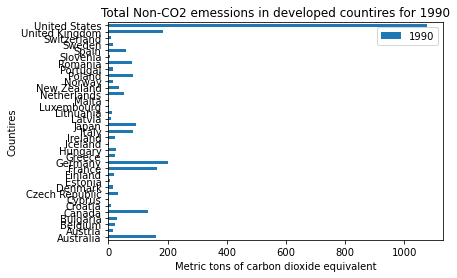

In [39]:
hbar_1990 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='1990')
plt.title("Total Non-CO2 emessions in developed countires for 1990")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

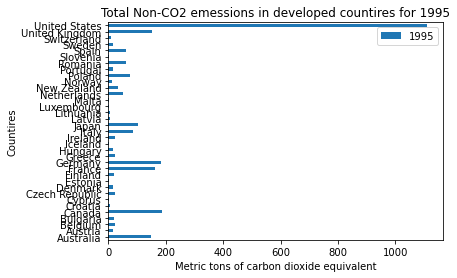

In [44]:
hbar_1995 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='1995')
plt.title("Total Non-CO2 emessions in developed countires for 1995")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

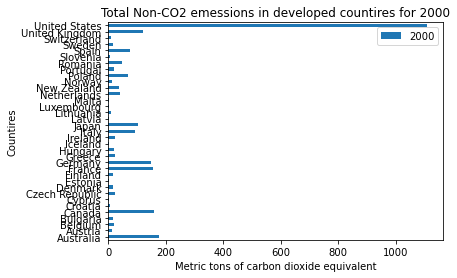

In [43]:
hbar_2000 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2000')
plt.title("Total Non-CO2 emessions in developed countires for 2000")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

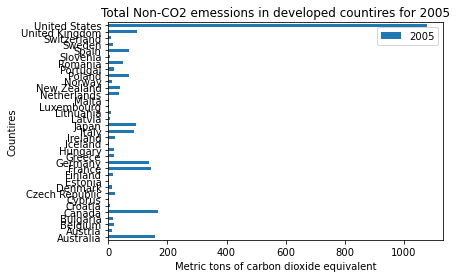

In [45]:
hbar_2005 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2005')
plt.title("Total Non-CO2 emessions in developed countires for 2005")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

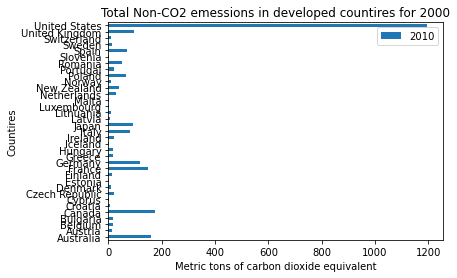

In [42]:
hbar_2010 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2010')
plt.title("Total Non-CO2 emessions in developed countires for 2000")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

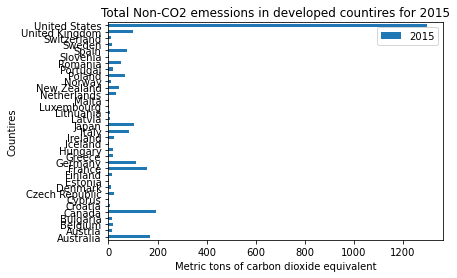

In [46]:
hbar_2015 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2015')
plt.title("Total Non-CO2 emessions in developed countires for 2015")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

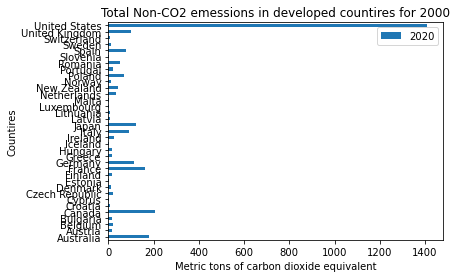

In [41]:
hbar_2020 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2020')
plt.title("Total Non-CO2 emessions in developed countires for 2000")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

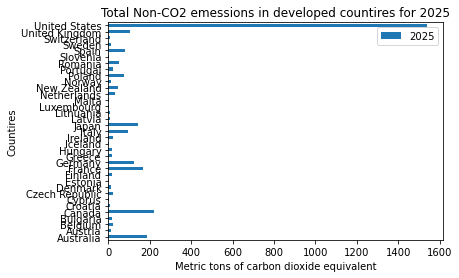

In [47]:
hbar_2025 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2025')
plt.title("Total Non-CO2 emessions in developed countires for 2025")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")

Text(0.5, 0, 'Metric tons of carbon dioxide equivalent')

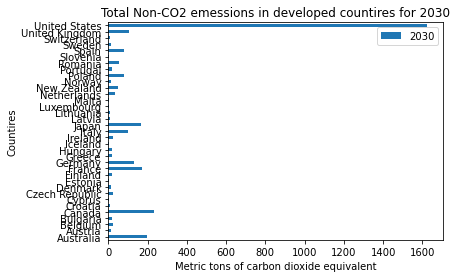

In [40]:
hbar_2030 = nonco2_emissions_developed_countries.plot.barh(x='Name', y='2030')
plt.title("Total Non-CO2 emessions in developed countires for 2030")
plt.ylabel("Countires")
plt.xlabel("Metric tons of carbon dioxide equivalent")